# Introduction to Scientific Programming with Python

## Session 4: Pandas


Ingolf Becker, i.becker@cs.ucl.ac.uk. 

Most content is taken from [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html), and the numerous other cookbooks, help pages, and introductions on [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)

Code is up-to-date for Python 3.6 and pandas 0.19.2.

## Outline
* Creating objects
* Viwing data
* Selecting data
* Manipulating data
* Grouping
* Reshaping
* Plotting
* Data input and output

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([2, 2, 5, np.nan, 9, 10, 12])

In [4]:
s

0     2.0
1     2.0
2     5.0
3     NaN
4     9.0
5    10.0
6    12.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

A         B         C         D
2013-01-01  0.031826  0.613369  0.052518 -0.770353
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-04 -0.602432  0.994808 -3.071437  0.156785
2013-01-05 -0.564429 -0.776849  0.589613  0.353085
2013-01-06  1.175203 -0.040056 -0.604208  0.175833

In [9]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [10]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

Having specific dtypes

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

You can access the individual columns by a number of ways:

In [12]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [13]:
df['A']

2013-01-01    0.031826
2013-01-02   -0.694534
2013-01-03    0.459894
2013-01-04   -0.602432
2013-01-05   -0.564429
2013-01-06    1.175203
Freq: D, Name: A, dtype: float64

In [14]:
df.loc[:,"A"]

2013-01-01    0.031826
2013-01-02   -0.694534
2013-01-03    0.459894
2013-01-04   -0.602432
2013-01-05   -0.564429
2013-01-06    1.175203
Freq: D, Name: A, dtype: float64

## Viewing Data

See the top & bottom rows of the frame

In [15]:
df.head()

A         B         C         D
2013-01-01  0.031826  0.613369  0.052518 -0.770353
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-04 -0.602432  0.994808 -3.071437  0.156785
2013-01-05 -0.564429 -0.776849  0.589613  0.353085

In [16]:
df.tail(3)

A         B         C         D
2013-01-04 -0.602432  0.994808 -3.071437  0.156785
2013-01-05 -0.564429 -0.776849  0.589613  0.353085
2013-01-06  1.175203 -0.040056 -0.604208  0.175833

Display the index, columns, and the underlying numpy data

In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[ 0.03182622,  0.61336936,  0.05251798, -0.77035275],
       [-0.69453424,  0.26599262,  0.89939259, -0.95050636],
       [ 0.45989418,  0.38744917,  0.69742531,  0.82738877],
       [-0.60243199,  0.99480765, -3.07143696,  0.15678536],
       [-0.56442931, -0.7768488 ,  0.58961301,  0.35308455],
       [ 1.17520334, -0.04005606, -0.60420811,  0.17583307]])

Describe shows a quick statistic summary of your data

In [20]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.032412  0.240786 -0.239449 -0.034628
std    0.741781  0.607283  1.489999  0.686214
min   -0.694534 -0.776849 -3.071437 -0.950506
25%   -0.592931  0.036456 -0.440027 -0.538568
50%   -0.266302  0.326721  0.321065  0.166309
75%    0.352877  0.556889  0.670472  0.308772
max    1.175203  0.994808  0.899393  0.827389

Transposing your data

In [21]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    0.031826   -0.694534    0.459894   -0.602432   -0.564429    1.175203
B    0.613369    0.265993    0.387449    0.994808   -0.776849   -0.040056
C    0.052518    0.899393    0.697425   -3.071437    0.589613   -0.604208
D   -0.770353   -0.950506    0.827389    0.156785    0.353085    0.175833

Sorting by an axis

In [22]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -0.770353  0.052518  0.613369  0.031826
2013-01-02 -0.950506  0.899393  0.265993 -0.694534
2013-01-03  0.827389  0.697425  0.387449  0.459894
2013-01-04  0.156785 -3.071437  0.994808 -0.602432
2013-01-05  0.353085  0.589613 -0.776849 -0.564429
2013-01-06  0.175833 -0.604208 -0.040056  1.175203

Sorting by values

In [23]:
df.sort_values(by='B')

A         B         C         D
2013-01-05 -0.564429 -0.776849  0.589613  0.353085
2013-01-06  1.175203 -0.040056 -0.604208  0.175833
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-01  0.031826  0.613369  0.052518 -0.770353
2013-01-04 -0.602432  0.994808 -3.071437  0.156785

## Selection

### Getting

Selecting a single column, which yields a Series, equivalent to `df.A`

In [24]:
df['A']

2013-01-01    0.031826
2013-01-02   -0.694534
2013-01-03    0.459894
2013-01-04   -0.602432
2013-01-05   -0.564429
2013-01-06    1.175203
Freq: D, Name: A, dtype: float64

Selecting via `[]`, which slices the rows.

In [25]:
df[0:3]

A         B         C         D
2013-01-01  0.031826  0.613369  0.052518 -0.770353
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389

In [26]:
df['20130102':'20130104']

A         B         C         D
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-04 -0.602432  0.994808 -3.071437  0.156785

### Selection by Label

For getting a cross section using a label

In [27]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df.loc[dates[0]]

A    0.031826
B    0.613369
C    0.052518
D   -0.770353
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [29]:
df.loc[:, ['A', 'B']]

A         B
2013-01-01  0.031826  0.613369
2013-01-02 -0.694534  0.265993
2013-01-03  0.459894  0.387449
2013-01-04 -0.602432  0.994808
2013-01-05 -0.564429 -0.776849
2013-01-06  1.175203 -0.040056

Showing label slicing, both endpoints are included

In [30]:
df.loc['20130102':'20130104',['A','B']]

A         B
2013-01-02 -0.694534  0.265993
2013-01-03  0.459894  0.387449
2013-01-04 -0.602432  0.994808

Reduction in the dimensions of the returned object

In [31]:
df.loc['20130102',['A','B']]

A   -0.694534
B    0.265993
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [32]:
df.loc[dates[0],'A']

0.03182622175765993

For getting fast access to a scalar (equiv to the prior method)

In [33]:
df.at[dates[0], 'A']

0.03182622175765993

### Selection by Position

Select via the position of the passed integers

In [34]:
df.iloc[3]

A   -0.602432
B    0.994808
C   -3.071437
D    0.156785
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [35]:
df.iloc[3:5, 0:2]

A         B
2013-01-04 -0.602432  0.994808
2013-01-05 -0.564429 -0.776849

By lists of integer position locations, similar to the numpy/python style

In [36]:
df.iloc[[1,2,4],[0,2]]

A         C
2013-01-02 -0.694534  0.899393
2013-01-03  0.459894  0.697425
2013-01-05 -0.564429  0.589613

For slicing rows explicitly

In [37]:
df.iloc[1:3,:]

A         B         C         D
2013-01-02 -0.694534  0.265993  0.899393 -0.950506
2013-01-03  0.459894  0.387449  0.697425  0.827389

For slicing columns explicitly

In [38]:
df.iloc[:,1:3]

B         C
2013-01-01  0.613369  0.052518
2013-01-02  0.265993  0.899393
2013-01-03  0.387449  0.697425
2013-01-04  0.994808 -3.071437
2013-01-05 -0.776849  0.589613
2013-01-06 -0.040056 -0.604208

For getting a value explicitly

In [39]:
df.iloc[1,1]

0.26599261910672228

For getting fast access to a scalar (equiv to the prior method)

In [40]:
df.iat[1,1]

0.26599261910672228

### Boolean Indexing

Using a single column’s values to select data.

In [41]:
df[df.A > 0]

A         B         C         D
2013-01-01  0.031826  0.613369  0.052518 -0.770353
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-06  1.175203 -0.040056 -0.604208  0.175833

A `where` operation for getting.

In [42]:
df[df > 0]

A         B         C         D
2013-01-01  0.031826  0.613369  0.052518       NaN
2013-01-02       NaN  0.265993  0.899393       NaN
2013-01-03  0.459894  0.387449  0.697425  0.827389
2013-01-04       NaN  0.994808       NaN  0.156785
2013-01-05       NaN       NaN  0.589613  0.353085
2013-01-06  1.175203       NaN       NaN  0.175833

Using the `isin()` method for filtering:

In [43]:
df2 = df.copy()

In [44]:
df2['E'] = ['one', 'one','two','three','four','three']

In [45]:
df2

A         B         C         D      E
2013-01-01  0.031826  0.613369  0.052518 -0.770353    one
2013-01-02 -0.694534  0.265993  0.899393 -0.950506    one
2013-01-03  0.459894  0.387449  0.697425  0.827389    two
2013-01-04 -0.602432  0.994808 -3.071437  0.156785  three
2013-01-05 -0.564429 -0.776849  0.589613  0.353085   four
2013-01-06  1.175203 -0.040056 -0.604208  0.175833  three

In [46]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2013-01-03  0.459894  0.387449  0.697425  0.827389   two
2013-01-05 -0.564429 -0.776849  0.589613  0.353085  four

### Setting

Setting a new column automatically aligns the data by the indexes

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [48]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [49]:
df['F'] = s1

In [50]:
df

A         B         C         D    F
2013-01-01  0.031826  0.613369  0.052518 -0.770353  NaN
2013-01-02 -0.694534  0.265993  0.899393 -0.950506  1.0
2013-01-03  0.459894  0.387449  0.697425  0.827389  2.0
2013-01-04 -0.602432  0.994808 -3.071437  0.156785  3.0
2013-01-05 -0.564429 -0.776849  0.589613  0.353085  4.0
2013-01-06  1.175203 -0.040056 -0.604208  0.175833  5.0

Setting values by label

In [51]:
df.at[dates[0], 'A'] = 0

In [52]:
df

A         B         C         D    F
2013-01-01  0.000000  0.613369  0.052518 -0.770353  NaN
2013-01-02 -0.694534  0.265993  0.899393 -0.950506  1.0
2013-01-03  0.459894  0.387449  0.697425  0.827389  2.0
2013-01-04 -0.602432  0.994808 -3.071437  0.156785  3.0
2013-01-05 -0.564429 -0.776849  0.589613  0.353085  4.0
2013-01-06  1.175203 -0.040056 -0.604208  0.175833  5.0

Setting values by position

In [53]:
df.iat[0,1] = 0

In [54]:
df

A         B         C         D    F
2013-01-01  0.000000  0.000000  0.052518 -0.770353  NaN
2013-01-02 -0.694534  0.265993  0.899393 -0.950506  1.0
2013-01-03  0.459894  0.387449  0.697425  0.827389  2.0
2013-01-04 -0.602432  0.994808 -3.071437  0.156785  3.0
2013-01-05 -0.564429 -0.776849  0.589613  0.353085  4.0
2013-01-06  1.175203 -0.040056 -0.604208  0.175833  5.0

Setting by assigning with a numpy array

In [55]:
 df.loc[:,'D'] = np.array([5] * len(df))

In [56]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.052518  5  NaN
2013-01-02 -0.694534  0.265993  0.899393  5  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
2013-01-06  1.175203 -0.040056 -0.604208  5  5.0

A where operation with setting.

In [57]:
df2 = df.copy()

In [58]:
df2[df2 > 0] = -df2

In [59]:
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.052518 -5  NaN
2013-01-02 -0.694534 -0.265993 -0.899393 -5 -1.0
2013-01-03 -0.459894 -0.387449 -0.697425 -5 -2.0
2013-01-04 -0.602432 -0.994808 -3.071437 -5 -3.0
2013-01-05 -0.564429 -0.776849 -0.589613 -5 -4.0
2013-01-06 -1.175203 -0.040056 -0.604208 -5 -5.0

## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [60]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [61]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [62]:
df1

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.052518  5  NaN  1.0
2013-01-02 -0.694534  0.265993  0.899393  5  1.0  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0  NaN
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0  NaN

To drop any rows that have missing data.

In [63]:
df1.dropna(how='any')

A         B         C  D    F    E
2013-01-02 -0.694534  0.265993  0.899393  5  1.0  1.0

Filling in missing data

In [64]:
df1.fillna(value=5)

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.052518  5  5.0  1.0
2013-01-02 -0.694534  0.265993  0.899393  5  1.0  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0  5.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0  5.0

To get the boolean mask where values are `nan`

In [65]:
pd.isnull(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

## Operations

### Boolean operations

With binary operations between pandas data structures, there are two key points of interest:

* Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.
* Missing data in computations

We will demonstrate how to manage these issues independently, though they can be handled simultaneously.

DataFrame has the methods `add()`, `sub()`, `mul()`, `div()` and related functions `radd()`, `rsub()`, ... for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the index or columns via the `axis` keyword:

In [66]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.052518  5  NaN
2013-01-02 -0.694534  0.265993  0.899393  5  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
2013-01-06  1.175203 -0.040056 -0.604208  5  5.0

Subtract row

In [67]:
df.sub(df.loc[dates[1],:], axis='columns')

A         B         C    D    F
2013-01-01  0.694534 -0.265993 -0.846875  0.0  NaN
2013-01-02  0.000000  0.000000  0.000000  0.0  0.0
2013-01-03  1.154428  0.121457 -0.201967  0.0  1.0
2013-01-04  0.092102  0.728815 -3.970830  0.0  2.0
2013-01-05  0.130105 -1.042841 -0.309780  0.0  3.0
2013-01-06  1.869738 -0.306049 -1.503601  0.0  4.0

equivalent to:

In [68]:
df - df.loc[dates[1],:]

A         B         C    D    F
2013-01-01  0.694534 -0.265993 -0.846875  0.0  NaN
2013-01-02  0.000000  0.000000  0.000000  0.0  0.0
2013-01-03  1.154428  0.121457 -0.201967  0.0  1.0
2013-01-04  0.092102  0.728815 -3.970830  0.0  2.0
2013-01-05  0.130105 -1.042841 -0.309780  0.0  3.0
2013-01-06  1.869738 -0.306049 -1.503601  0.0  4.0

Subtract columns

In [69]:
df.sub(df.A, axis='rows')

A         B         C         D         F
2013-01-01  0.0  0.000000  0.052518  5.000000       NaN
2013-01-02  0.0  0.960527  1.593927  5.694534  1.694534
2013-01-03  0.0 -0.072445  0.237531  4.540106  1.540106
2013-01-04  0.0  1.597240 -2.469005  5.602432  3.602432
2013-01-05  0.0 -0.212419  1.154042  5.564429  4.564429
2013-01-06  0.0 -1.215259 -1.779411  3.824797  3.824797

### Flexible comparisons

This also works for `>`, $\ne$ etc:

In [70]:
df.gt(df*2)

A      B      C      D      F
2013-01-01  False  False  False  False  False
2013-01-02   True  False  False  False  False
2013-01-03  False  False  False  False  False
2013-01-04   True  False   True  False  False
2013-01-05   True   True  False  False  False
2013-01-06  False   True   True  False  False

These operations produce a pandas object the same type as the left-hand-side input that if of dtype `bool`.

### Boolean Reductions

You can apply the reductions: `empty`, `any()`, `all()`, and `bool()` to provide a way to summarize a boolean result.

In [71]:
(df > 0).all()

A    False
B    False
C    False
D     True
F    False
dtype: bool

In [72]:
(df > 0).any()

A    True
B    True
C    True
D    True
F    True
dtype: bool

In [73]:
(df > 0).any().any()

True

You can test if a pandas object is empty, via the empty property.

In [74]:
df.empty

False

In [75]:
pd.DataFrame(columns=list('ABC')).empty

True

### Stats

In [76]:
df.mean()

A   -0.037716
B    0.138557
C   -0.239449
D    5.000000
F    3.000000
dtype: float64

In [77]:
df.mean(axis=1)

2013-01-01    1.263129
2013-01-02    1.294170
2013-01-03    1.708954
2013-01-04    1.064188
2013-01-05    1.649667
2013-01-06    2.106188
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [78]:
df.apply(np.cumsum)

A         B         C   D     F
2013-01-01  0.000000  0.000000  0.052518   5   NaN
2013-01-02 -0.694534  0.265993  0.951911  10   1.0
2013-01-03 -0.234640  0.653442  1.649336  15   3.0
2013-01-04 -0.837072  1.648249 -1.422101  20   6.0
2013-01-05 -1.401501  0.871401 -0.832488  25  10.0
2013-01-06 -0.226298  0.831345 -1.436696  30  15.0

In [79]:
df.apply(lambda x: x.max() - x.min())

A    1.869738
B    1.771656
C    3.970830
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [80]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [81]:
s

0    4
1    5
2    6
3    1
4    1
5    1
6    0
7    3
8    5
9    6
dtype: int32

In [82]:
s.value_counts()

1    3
6    2
5    2
4    1
3    1
0    1
dtype: int64

## Merge

### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with `concat()`:

In [83]:
pieces = [df[:3], df[3:7], df[7:]]

In [84]:
pieces

[                   A         B         C  D    F
 2013-01-01  0.000000  0.000000  0.052518  5  NaN
 2013-01-02 -0.694534  0.265993  0.899393  5  1.0
 2013-01-03  0.459894  0.387449  0.697425  5  2.0,
                    A         B         C  D    F
 2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
 2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
 2013-01-06  1.175203 -0.040056 -0.604208  5  5.0,
 Empty DataFrame
 Columns: [A, B, C, D, F]
 Index: []]

In [85]:
pd.concat(pieces)

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.052518  5  NaN
2013-01-02 -0.694534  0.265993  0.899393  5  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
2013-01-06  1.175203 -0.040056 -0.604208  5  5.0

### Join
SQL style merges

In [86]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [87]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [88]:
left

key  lval
0  foo     1
1  foo     2

In [89]:
right

key  rval
0  foo     4
1  foo     5

In [90]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

### Append

Append rows to a dataframe

In [91]:
df.append(df)

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.052518  5  NaN
2013-01-02 -0.694534  0.265993  0.899393  5  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
2013-01-06  1.175203 -0.040056 -0.604208  5  5.0
2013-01-01  0.000000  0.000000  0.052518  5  NaN
2013-01-02 -0.694534  0.265993  0.899393  5  1.0
2013-01-03  0.459894  0.387449  0.697425  5  2.0
2013-01-04 -0.602432  0.994808 -3.071437  5  3.0
2013-01-05 -0.564429 -0.776849  0.589613  5  4.0
2013-01-06  1.175203 -0.040056 -0.604208  5  5.0

## Grouping

By "group by" we are referring to a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure



In [92]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo', 'foo', 'bar', 'foo', 'bar'],
                    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three', 'three', 'two', 'two', 'one'],
                    'C' : ['G', 'H', 'I'] * 4,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [93]:
df

A      B  C         D         E
0   foo    one  G  0.004412  1.074876
1   bar    one  H  2.778545 -0.320434
2   foo    two  I  0.194575  0.136958
3   bar  three  G -1.614719 -0.207036
4   foo    two  H  0.436048 -0.107181
5   bar    two  I  0.634265 -0.673782
6   foo    one  G  0.719702 -1.118806
7   foo  three  H  0.335190  0.395891
8   foo  three  I  0.919881 -0.118719
9   bar    two  G -1.577895  0.575706
10  foo    two  H  0.119559  0.212799
11  bar    one  I  0.050922  1.302453

Grouping and then applying a function `sum` to the resulting groups.

In [94]:
df.groupby('A').sum()

D         E
A                      
bar  0.271119  0.676906
foo  2.729367  0.475821

Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [95]:
df.groupby(['A','B']).sum()

D         E
A   B                        
bar one    2.829467  0.982019
    three -1.614719 -0.207036
    two   -0.943630 -0.098076
foo one    0.724114 -0.043929
    three  1.255072  0.277173
    two    0.750182  0.242577

### Pivot Tables

We can produce pivot tables from this data very easily:

In [96]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C                 G         H         I
A   B                                  
bar one         NaN  2.778545  0.050922
    three -1.614719       NaN       NaN
    two   -1.577895       NaN  0.634265
foo one    0.362057       NaN       NaN
    three       NaN  0.335190  0.919881
    two         NaN  0.277803  0.194575

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications

In [97]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S')

In [98]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [99]:
ts

2012-01-01 00:00:00    1.184042
2012-01-01 00:00:01    0.406687
2012-01-01 00:00:02   -1.484565
2012-01-01 00:00:03    1.189896
2012-01-01 00:00:04    0.748926
2012-01-01 00:00:05   -0.146873
2012-01-01 00:00:06   -0.028118
2012-01-01 00:00:07   -1.399343
2012-01-01 00:00:08   -0.524428
2012-01-01 00:00:09    0.365873
2012-01-01 00:00:10    0.360449
2012-01-01 00:00:11    1.949835
2012-01-01 00:00:12    1.227801
2012-01-01 00:00:13    0.699722
2012-01-01 00:00:14    0.093819
2012-01-01 00:00:15   -0.540174
2012-01-01 00:00:16   -1.431932
2012-01-01 00:00:17    0.351709
2012-01-01 00:00:18   -1.256325
2012-01-01 00:00:19    0.281619
2012-01-01 00:00:20    0.642264
2012-01-01 00:00:21   -1.269545
2012-01-01 00:00:22   -1.718568
2012-01-01 00:00:23    0.676912
2012-01-01 00:00:24   -0.291052
2012-01-01 00:00:25   -1.116299
2012-01-01 00:00:26    0.868794
2012-01-01 00:00:27    0.850918
2012-01-01 00:00:28    1.146602
2012-01-01 00:00:29   -1.446508
                         ...   
2012-01-

In [100]:
ts.resample('5Min').sum()

2012-01-01 00:00:00    -2.635907
2012-01-01 00:05:00    -9.551452
2012-01-01 00:10:00    13.872570
2012-01-01 00:15:00     3.323308
Freq: 5T, dtype: float64

## Plotting

Plotting data is very straight forward:

In [101]:
ts = ts.cumsum()

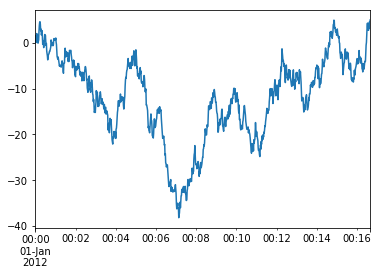

In [102]:
ts.plot()

In [103]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

We can make very fancy looking plots quickly:

In [104]:
df = df.cumsum()

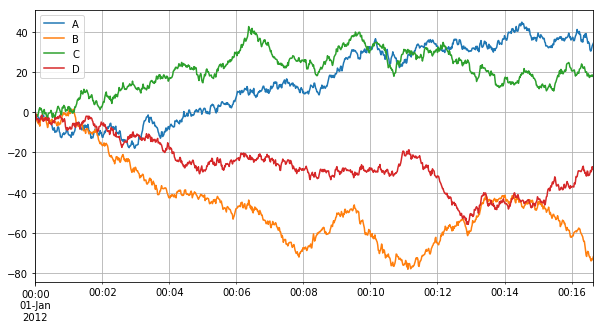

In [105]:
df.plot(figsize=(10,5))
plt.grid(True, which='both')
plt.legend(loc='best');

## Getting Data In/Out


### CSV
Writing to a file

In [106]:
df.to_csv('foo.csv')

Reading from a csv

In [107]:
pd.read_csv('foo.csv')

Unnamed: 0          A          B          C          D
0    2012-01-01 00:00:00  -1.097237  -1.846375  -0.595944  -0.924513
1    2012-01-01 00:00:01  -2.458475  -2.282458  -1.508466  -0.744094
2    2012-01-01 00:00:02  -2.220025  -2.890549  -1.745574  -2.786387
3    2012-01-01 00:00:03  -1.671967  -4.399695  -1.308691  -3.747204
4    2012-01-01 00:00:04  -1.634080  -4.954021  -1.971337  -3.319897
5    2012-01-01 00:00:05  -2.389837  -5.506915  -1.076114  -3.279252
6    2012-01-01 00:00:06  -3.646950  -5.733625   0.333999  -5.086975
7    2012-01-01 00:00:07  -3.183926  -5.437753   1.574949  -4.174144
8    2012-01-01 00:00:08  -3.214396  -6.900452   2.277687  -3.898027
9    2012-01-01 00:00:09  -2.483927  -4.205725   1.272728  -3.404771
10   2012-01-01 00:00:10  -2.138900  -3.647408   1.940634  -3.301006
11   2012-01-01 00:00:11  -2.176288  -2.373382   1.355094  -1.451574
12   2012-01-01 00:00:12  -2.889403  -2.938165   0.080126  -1.637039
13   2012-01-01 00:00:13  -2.194453  -3.924465  -1.077489  -3.819370
14   2012-01-01 00:00:14  -1.397127  -3.900642   0.378504  -4.447994
15   2012-01-01 00:00:15  -1.717334  -3.815869   0.787711  -4.443271
16   2012-01-01 00:00:16  -2.916776  -2.634766   1.364411  -3.121069
17   2012-01-01 00:00:17  -3.323134  -3.534245  -0.807059  -3.926886
18   2012-01-01 00:00:18  -3.075200  -3.492639  -0.355864  -3.477002
19   2012-01-01 00:00:19  -3.551154  -3.847017  -0.267550  -2.518643
20   2012-01-01 00:00:20  -2.861346  -4.943229  -2.061391  -3.138432
21   2012-01-01 00:00:21  -2.979133  -6.218433  -2.125055  -4.017460
22   2012-01-01 00:00:22  -2.298622  -7.586231  -2.901131  -3.369167
23   2012-01-01 00:00:23  -3.188577  -6.362945  -0.810179  -3.859763
24   2012-01-01 00:00:24  -4.256196  -4.487258  -0.421138  -2.751944
25   2012-01-01 00:00:25  -4.976768  -4.717053  -0.364727  -5.365386
26   2012-01-01 00:00:26  -4.377305  -3.821789  -0.223173  -5.520121
27   2012-01-01 00:00:27  -4.666602  -4.955802  -0.129434  -5.176264
28   2012-01-01 00:00:28  -5.436777  -4.996138   0.949575  -5.920061
29   2012-01-01 00:00:29  -6.259683  -5.145670   0.157291  -6.247796
..                   ...        ...        ...        ...        ...
970  2012-01-01 00:16:10  41.195070 -58.772412  18.925165 -31.989841
971  2012-01-01 00:16:11  39.986920 -58.584273  19.971261 -30.661676
972  2012-01-01 00:16:12  39.474264 -58.074391  19.562539 -29.176371
973  2012-01-01 00:16:13  39.072732 -57.552209  19.362066 -29.081336
974  2012-01-01 00:16:14  40.196874 -57.989209  21.382460 -29.142394
975  2012-01-01 00:16:15  38.662743 -58.087682  21.644682 -29.285454
976  2012-01-01 00:16:16  38.642475 -59.653890  21.835716 -29.411011
977  2012-01-01 00:16:17  35.529519 -60.137641  22.771035 -29.495853
978  2012-01-01 00:16:18  35.138525 -60.745574  24.039116 -28.930450
979  2012-01-01 00:16:19  36.017233 -61.456815  23.387712 -28.300921
980  2012-01-01 00:16:20  34.887150 -61.924342  22.389887 -27.206119
981  2012-01-01 00:16:21  36.512564 -63.403176  21.809032 -26.812324
982  2012-01-01 00:16:22  38.192952 -64.225156  22.260845 -29.062016
983  2012-01-01 00:16:23  37.506351 -64.207110  22.598606 -28.855348
984  2012-01-01 00:16:24  38.884774 -66.207511  21.180757 -30.371936
985  2012-01-01 00:16:25  37.333320 -68.524175  19.870225 -30.024405
986  2012-01-01 00:16:26  39.103972 -70.960430  19.944214 -31.570734
987  2012-01-01 00:16:27  37.327137 -71.702042  20.101766 -31.716605
988  2012-01-01 00:16:28  36.418878 -69.674679  18.099716 -29.237786
989  2012-01-01 00:16:29  34.332042 -69.167830  18.139668 -29.347227
990  2012-01-01 00:16:30  35.080795 -69.404173  19.127970 -31.500153
991  2012-01-01 00:16:31  34.665768 -70.968865  18.320538 -31.050783
992  2012-01-01 00:16:32  34.120438 -71.849432  17.286872 -31.211512
993  2012-01-01 00:16:33  31.220320 -71.818360  18.312503 -30.247756
994  2012-01-01 00:16:34  30.470707 -73.197114  17.762064 -28.902828
995  2012-01-01 00:16:35  30.549044 -73.927632  18.146408 -29.627493
996  2012-01

### HDF5
Reading and writing to HDFStores

In [108]:
df.to_hdf('foo.h5', 'df')

In [109]:
pd.read_hdf('foo.h5', 'df')

A          B          C          D
2012-01-01 00:00:00  -1.097237  -1.846375  -0.595944  -0.924513
2012-01-01 00:00:01  -2.458475  -2.282458  -1.508466  -0.744094
2012-01-01 00:00:02  -2.220025  -2.890549  -1.745574  -2.786387
2012-01-01 00:00:03  -1.671967  -4.399695  -1.308691  -3.747204
2012-01-01 00:00:04  -1.634080  -4.954021  -1.971337  -3.319897
2012-01-01 00:00:05  -2.389837  -5.506915  -1.076114  -3.279252
2012-01-01 00:00:06  -3.646950  -5.733625   0.333999  -5.086975
2012-01-01 00:00:07  -3.183926  -5.437753   1.574949  -4.174144
2012-01-01 00:00:08  -3.214396  -6.900452   2.277687  -3.898027
2012-01-01 00:00:09  -2.483927  -4.205725   1.272728  -3.404771
2012-01-01 00:00:10  -2.138900  -3.647408   1.940634  -3.301006
2012-01-01 00:00:11  -2.176288  -2.373382   1.355094  -1.451574
2012-01-01 00:00:12  -2.889403  -2.938165   0.080126  -1.637039
2012-01-01 00:00:13  -2.194453  -3.924465  -1.077489  -3.819370
2012-01-01 00:00:14  -1.397127  -3.900642   0.378504  -4.447994
2012-01-01 00:00:15  -1.717334  -3.815869   0.787711  -4.443271
2012-01-01 00:00:16  -2.916776  -2.634766   1.364411  -3.121069
2012-01-01 00:00:17  -3.323134  -3.534245  -0.807059  -3.926886
2012-01-01 00:00:18  -3.075200  -3.492639  -0.355864  -3.477002
2012-01-01 00:00:19  -3.551154  -3.847017  -0.267550  -2.518643
2012-01-01 00:00:20  -2.861346  -4.943229  -2.061391  -3.138432
2012-01-01 00:00:21  -2.979133  -6.218433  -2.125055  -4.017460
2012-01-01 00:00:22  -2.298622  -7.586231  -2.901131  -3.369167
2012-01-01 00:00:23  -3.188577  -6.362945  -0.810179  -3.859763
2012-01-01 00:00:24  -4.256196  -4.487258  -0.421138  -2.751944
2012-01-01 00:00:25  -4.976768  -4.717053  -0.364727  -5.365386
2012-01-01 00:00:26  -4.377305  -3.821789  -0.223173  -5.520121
2012-01-01 00:00:27  -4.666602  -4.955802  -0.129434  -5.176264
2012-01-01 00:00:28  -5.436777  -4.996138   0.949575  -5.920061
2012-01-01 00:00:29  -6.259683  -5.145670   0.157291  -6.247796
...                        ...        ...        ...        ...
2012-01-01 00:16:10  41.195070 -58.772412  18.925165 -31.989841
2012-01-01 00:16:11  39.986920 -58.584273  19.971261 -30.661676
2012-01-01 00:16:12  39.474264 -58.074391  19.562539 -29.176371
2012-01-01 00:16:13  39.072732 -57.552209  19.362066 -29.081336
2012-01-01 00:16:14  40.196874 -57.989209  21.382460 -29.142394
2012-01-01 00:16:15  38.662743 -58.087682  21.644682 -29.285454
2012-01-01 00:16:16  38.642475 -59.653890  21.835716 -29.411011
2012-01-01 00:16:17  35.529519 -60.137641  22.771035 -29.495853
2012-01-01 00:16:18  35.138525 -60.745574  24.039116 -28.930450
2012-01-01 00:16:19  36.017233 -61.456815  23.387712 -28.300921
2012-01-01 00:16:20  34.887150 -61.924342  22.389887 -27.206119
2012-01-01 00:16:21  36.512564 -63.403176  21.809032 -26.812324
2012-01-01 00:16:22  38.192952 -64.225156  22.260845 -29.062016
2012-01-01 00:16:23  37.506351 -64.207110  22.598606 -28.855348
2012-01-01 00:16:24  38.884774 -66.207511  21.180757 -30.371936
2012-01-01 00:16:25  37.333320 -68.524175  19.870225 -30.024405
2012-01-01 00:16:26  39.103972 -70.960430  19.944214 -31.570734
2012-01-01 00:16:27  37.327137 -71.702042  20.101766 -31.716605
2012-01-01 00:16:28  36.418878 -69.674679  18.099716 -29.237786
2012-01-01 00:16:29  34.332042 -69.167830  18.139668 -29.347227
2012-01-01 00:16:30  35.080795 -69.404173  19.127970 -31.500153
2012-01-01 00:16:31  34.665768 -70.968865  18.320538 -31.050783
2012-01-01 00:16:32  34.120438 -71.849432  17.286872 -31.211512
2012-01-01 00:16:33  31.220320 -71.818360  18.312503 -30.247756
2012-01-01 00:16:34  30.470707 -73.197114  17.762064 -28.902828
2012-01-01 00:16:35  30.549044 -73.927632  18.146408 -29.627493
2012-01-01 00:16:36  31.823520 -72.900379  18.505597 -28.845056
2012-01-01 00:16:37  33.044965 -73.416938  17.803838 -27.043444
2012-01-01 00:16:38  33.643387 -72.777911  18.503470 -28.172105
2012-01-01 00:16:39  34.350663 -71.827948  18.590047 -28.190741

[1000 rows x 4 columns]

### Excel

Reading and writing to MS Excel

Writing to an excel file

In [110]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [111]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

A          B          C          D
2012-01-01 00:00:00  -1.097237  -1.846375  -0.595944  -0.924513
2012-01-01 00:00:01  -2.458475  -2.282458  -1.508466  -0.744094
2012-01-01 00:00:02  -2.220025  -2.890549  -1.745574  -2.786387
2012-01-01 00:00:03  -1.671967  -4.399695  -1.308691  -3.747204
2012-01-01 00:00:04  -1.634080  -4.954021  -1.971337  -3.319897
2012-01-01 00:00:05  -2.389837  -5.506915  -1.076114  -3.279252
2012-01-01 00:00:06  -3.646950  -5.733625   0.333999  -5.086975
2012-01-01 00:00:07  -3.183926  -5.437753   1.574949  -4.174144
2012-01-01 00:00:08  -3.214396  -6.900452   2.277687  -3.898027
2012-01-01 00:00:09  -2.483927  -4.205725   1.272728  -3.404771
2012-01-01 00:00:10  -2.138900  -3.647408   1.940634  -3.301006
2012-01-01 00:00:11  -2.176288  -2.373382   1.355094  -1.451574
2012-01-01 00:00:12  -2.889403  -2.938165   0.080126  -1.637039
2012-01-01 00:00:13  -2.194453  -3.924465  -1.077489  -3.819370
2012-01-01 00:00:14  -1.397127  -3.900642   0.378504  -4.447994
2012-01-01 00:00:15  -1.717334  -3.815869   0.787711  -4.443271
2012-01-01 00:00:16  -2.916776  -2.634766   1.364411  -3.121069
2012-01-01 00:00:17  -3.323134  -3.534245  -0.807059  -3.926886
2012-01-01 00:00:18  -3.075200  -3.492639  -0.355864  -3.477002
2012-01-01 00:00:19  -3.551154  -3.847017  -0.267550  -2.518643
2012-01-01 00:00:20  -2.861346  -4.943229  -2.061391  -3.138432
2012-01-01 00:00:21  -2.979133  -6.218433  -2.125055  -4.017460
2012-01-01 00:00:22  -2.298622  -7.586231  -2.901131  -3.369167
2012-01-01 00:00:23  -3.188577  -6.362945  -0.810179  -3.859763
2012-01-01 00:00:24  -4.256196  -4.487258  -0.421138  -2.751944
2012-01-01 00:00:25  -4.976768  -4.717053  -0.364727  -5.365386
2012-01-01 00:00:26  -4.377305  -3.821789  -0.223173  -5.520121
2012-01-01 00:00:27  -4.666602  -4.955802  -0.129434  -5.176264
2012-01-01 00:00:28  -5.436777  -4.996138   0.949575  -5.920061
2012-01-01 00:00:29  -6.259683  -5.145670   0.157291  -6.247796
...                        ...        ...        ...        ...
2012-01-01 00:16:10  41.195070 -58.772412  18.925165 -31.989841
2012-01-01 00:16:11  39.986920 -58.584273  19.971261 -30.661676
2012-01-01 00:16:12  39.474264 -58.074391  19.562539 -29.176371
2012-01-01 00:16:13  39.072732 -57.552209  19.362066 -29.081336
2012-01-01 00:16:14  40.196874 -57.989209  21.382460 -29.142394
2012-01-01 00:16:15  38.662743 -58.087682  21.644682 -29.285454
2012-01-01 00:16:16  38.642475 -59.653890  21.835716 -29.411011
2012-01-01 00:16:17  35.529519 -60.137641  22.771035 -29.495853
2012-01-01 00:16:18  35.138525 -60.745574  24.039116 -28.930450
2012-01-01 00:16:19  36.017233 -61.456815  23.387712 -28.300921
2012-01-01 00:16:20  34.887150 -61.924342  22.389887 -27.206119
2012-01-01 00:16:21  36.512564 -63.403176  21.809032 -26.812324
2012-01-01 00:16:22  38.192952 -64.225156  22.260845 -29.062016
2012-01-01 00:16:23  37.506351 -64.207110  22.598606 -28.855348
2012-01-01 00:16:24  38.884774 -66.207511  21.180757 -30.371936
2012-01-01 00:16:25  37.333320 -68.524175  19.870225 -30.024405
2012-01-01 00:16:26  39.103972 -70.960430  19.944214 -31.570734
2012-01-01 00:16:27  37.327137 -71.702042  20.101766 -31.716605
2012-01-01 00:16:28  36.418878 -69.674679  18.099716 -29.237786
2012-01-01 00:16:29  34.332042 -69.167830  18.139668 -29.347227
2012-01-01 00:16:30  35.080795 -69.404173  19.127970 -31.500153
2012-01-01 00:16:31  34.665768 -70.968865  18.320538 -31.050783
2012-01-01 00:16:32  34.120438 -71.849432  17.286872 -31.211512
2012-01-01 00:16:33  31.220320 -71.818360  18.312503 -30.247756
2012-01-01 00:16:34  30.470707 -73.197114  17.762064 -28.902828
2012-01-01 00:16:35  30.549044 -73.927632  18.146408 -29.627493
2012-01-01 00:16:36  31.823520 -72.900379  18.505597 -28.845056
2012-01-01 00:16:37  33.044965 -73.416938  17.803838 -27.043444
2012-01-01 00:16:38  33.643387 -72.777911  18.503470 -28.172105
2012-01-01 00:16:39  34.350663 -71.827948  18.590047 -28.190741

[1000 rows x 4 columns]

There are lots and lots and lots of good pandas tutorials out there.

Start here: http://pandas.pydata.org/pandas-docs/stable/tutorials.html